## Rendu du TP2

# Q1

In [28]:
import numpy as np
import math

def quadratic(A, b, x, order=0):
    tmp = 0.5*np.transpose(x)
    tmp = np.dot(tmp, A)
    tmp = np.dot(tmp, x)
    tmp -= np.dot(np.transpose(b), x)

    if (order==0):
        return tmp
    elif(order == 1):
        return tmp,(np.dot(A, x) - b)
    elif (order == 2):
        return tmp,(np.dot(A, x)-b),A
    else:
        return -1


# Q2

In [29]:
def rastrigin(x, order=0):
    n = len(x)
    p = np.pi
    s = 10 * n + np.sum(x**2 - 10 * np.cos(2 * p * x))
    
    if order == 0:
        return s

    elif order == 1:
        g = 2 * x + 20 * p * np.sin(2 * p * x)
        return s, g

    elif order == 2:
        g = 2 * x + 20 * p * np.sin(2 * p * x)
        h = np.diag(2 + 40 * (p ** 2) * np.cos(2 * p * x))
        return s, g, h

    else:
        return -1
        

# Preuve que la fonction de Rastrigin n’est pas convexe

## Définition

La fonction de Rastrigin en dimension \( n \) est définie par :  
$$
f(x) = 10n + \sum_{i=1}^{n} \left( x_i^2 - 10 \cos(2\pi x_i) \right)
$$

---

## Objectif

Montrer que la fonction **n’est pas convexe**.

---

## Étude en dimension 1

On peut étudier la fonction en dimension 1, car elle est séparée en somme de termes :  
$$
f(x) = x^2 - 10 \cos(2\pi x) + 10
$$

La dérivée seconde est :  
$$
f''(x) = 2 + 40 \pi^2 \cos(2\pi x)
$$

---

## Analyse du signe de \( f''(x) \)

On a :  
$$
f''(x) \in [2 - 40 \pi^2, \quad 2 + 40 \pi^2]
$$

Or,  
$$
40 \pi^2 \approx 394.78
$$
donc  
$$
f''(x) \in [-392.78, \quad 396.78]
$$

---

## Conclusion

La dérivée seconde prend des valeurs négatives, donc le Hessien n’est pas semi-défini positif partout.  

Ainsi, la fonction de Rastrigin **n’est pas convexe**.

$$
\boxed{
\text{La fonction } f \text{ n’est pas convexe.}
}
$$


# Q3

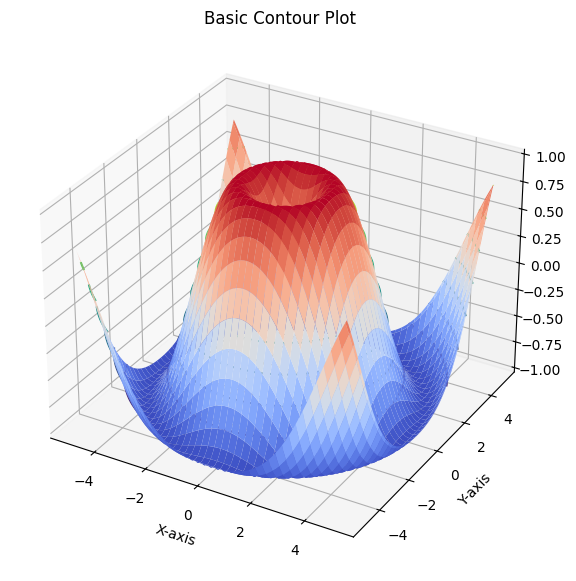

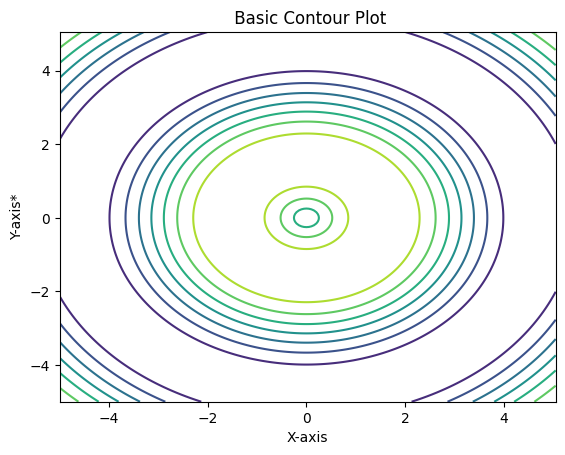

In [30]:
def func(x, y):
    return np.sin(math.sqrt(x*x+y*y))

import matplotlib.pyplot as plt
def tracer( func, x1=np.arange(-5, 5.1, 0.05), x2=np. arange(-5, 5.1, 0.05) ):
    x1, x2 = np.meshgrid(x1, x2)
    f = np.vectorize(func)
    z = f(x1,x2)
    fig = plt.figure(figsize= (7, 7) )
    axes = plt.axes (projection="3d")
    axes.plot_surface(x1, x2, z, cmap="coolwarm")
    plt.contour (x1, x2, z)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title( 'Basic Contour Plot')
    plt.show()



tracer(func)


def tracer2( func, x1=np.arange(-5, 5.1, 0.05), x2=np. arange (-5, 5.1, 0.05) ):
    x1, x2 = np.meshgrid(x1, x2)
    f = np.vectorize(func)
    z = f(x1,x2)
    plt.contour (x1, x2, z)
    plt.xlabel ('X-axis')
    plt.ylabel('Y-axis*')
    plt.title (' Basic Contour Plot' )
    plt. show ()

tracer2(func)


# Q4

In [31]:
import time


def descente_gradient_pas_optimal_quadratique(A, b, initial_x, eps=1e-15, maximum_iterations = 100):
    time1 = time.time()
    x = initial_x
    g = np.dot(A, x) - b
    d = -g
    l = [x.copy()]
    while (np.linalg.norm((np.dot(A, x)-b),2)>=eps and maximum_iterations > 0):
        t = np.dot(g.T, g) / np.dot(np.dot(g.T, A), g)        
        x = x + np.dot(t, d)
        g = np.dot(A, x) - b
        d = -g
        l.append(x.copy())
        maximum_iterations-=1

    time2 = time.time()
    temps_tot = time2 - time1
    return x, quadratic(A, b, x, order=0), temps_tot, l

# Matrice A définie positive
A = np.array([[3, 2],
              [2, 6]])

# Vecteur b
b = np.array([2, -8])

# Point initial
initial_x = np.array([0.0, 0.0])

# Appel de la fonction
x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A, b, initial_x)

# Résultats

print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)



Dernier point (x*) : [ 2. -2.]
Valeur de f(x*) : -10.0
Temps d'exécution : 0.0011897087097167969 secondes
Nombre d'itérations : 62


# Q5


In [32]:
import time


def gradient_conjugue_quadratique(A, b, initial_x, eps=1e-15):
    time1 = time.time()
    x = initial_x
    g = A @ x - b
    d = -g
    l = [x.copy()]
    while (np.linalg.norm((np.dot(A, x)-b),2)>=eps):
        t = -(g.T @ d) / (d.T @ A @ d)        
        x = x + t * d
        g = A @ x - b
        beta = (g.T @ A @ d)/(d.T @ A @ d)
        d = -g + beta * d
        l.append(x.copy())

    time2 = time.time()
    temps_tot = time2 - time1
    return x, quadratic(A, b, x, order=0), temps_tot, l

# Matrice A définie positive
A = np.array([[3, 2],
              [2, 6]])

# Vecteur b
b = np.array([2, -8])

# Point initial
initial_x = np.array([0.0, 0.0])

# Appel de la fonction
x_opt_con, f_x_opt_con, temps_con, points_con = gradient_conjugue_quadratique(A, b, initial_x)

# Résultats

print("Dernier point (x*) :", x_opt_con)
print("Valeur de f(x*) :", f_x_opt_con)
print("Temps d'exécution :", temps_con, "secondes")
print("Nombre d'itérations :", len(points_con) - 1)
print(points_con)

Dernier point (x*) : [ 2. -2.]
Valeur de f(x*) : -10.0
Temps d'exécution : 0.00011730194091796875 secondes
Nombre d'itérations : 2
[array([0., 0.]), array([ 0.40963855, -1.63855422]), array([ 2., -2.])]


# Q6

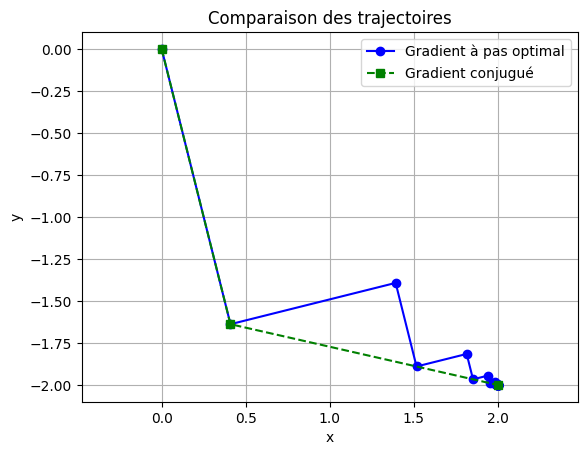

None


In [33]:

def comparaison(gd_xs, cg_xs):


    plt.plot([i[0] for i in gd_xs], [j[1] for j in gd_xs], 'o-', label='Gradient à pas optimal', color='blue')
    
    plt.plot([i[0] for i in cg_xs], [j[1] for j in cg_xs], 's--', label='Gradient conjugué', color='green')

    plt.title("Comparaison des trajectoires")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  
    plt.show()


print(comparaison(points_pas, points_con))

# Q7

## Pour l'exercice 14, 15, 16



Pour l'exercice 14:
Gradient à pas optimal

Dernier point (x*) : [-2. -1.]
Valeur de f(x*) : -6.0
Temps d'exécution : 0.0008802413940429688 secondes
Nombre d'itérations : 34

Gradient conjugué
Dernier point (x*) : [-2. -1.]
Valeur de f(x*) : -6.0
Temps d'exécution : 6.4849853515625e-05 secondes
Nombre d'itérations : 2


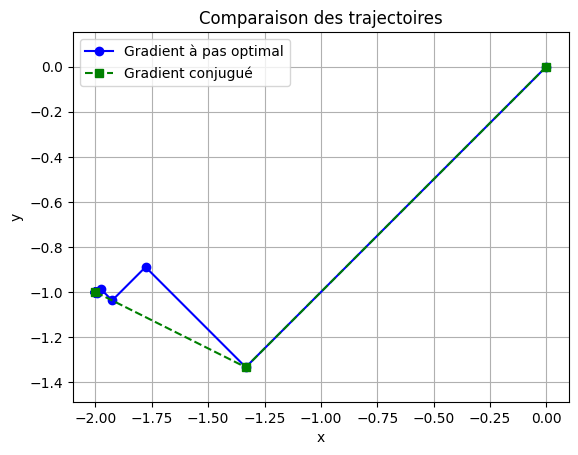

None

Pour l'exercice 15:

Gradient à pas optimal
Dernier point (x*) : [4. 2.]
Valeur de f(x*) : -16.0
Temps d'exécution : 0.0007038116455078125 secondes
Nombre d'itérations : 55

Gradient conjugué
Dernier point (x*) : [4. 2.]
Valeur de f(x*) : -16.0
Temps d'exécution : 5.698204040527344e-05 secondes
Nombre d'itérations : 2


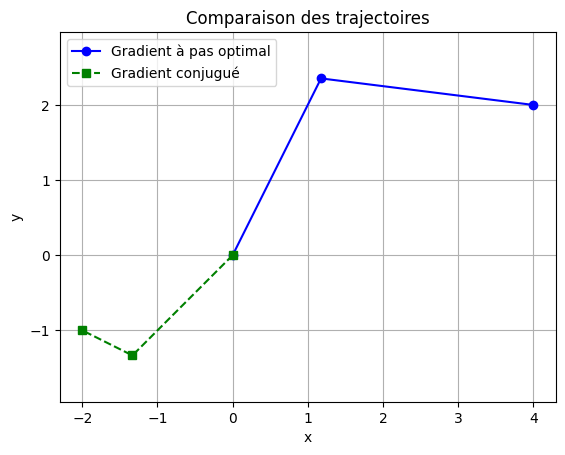

None

Pour l'exercice 16:

Dernier point (x*) : [1.00000000e+00 2.33768025e-16]
Valeur de f(x*) : -5.0
Temps d'exécution : 0.0004024505615234375 secondes
Nombre d'itérations : 33

Gradient conjugué
Dernier point (x*) : [1.00000000e+00 2.33417209e-16]
Valeur de f(x*) : -5.0
Temps d'exécution : 8.153915405273438e-05 secondes
Nombre d'itérations : 4


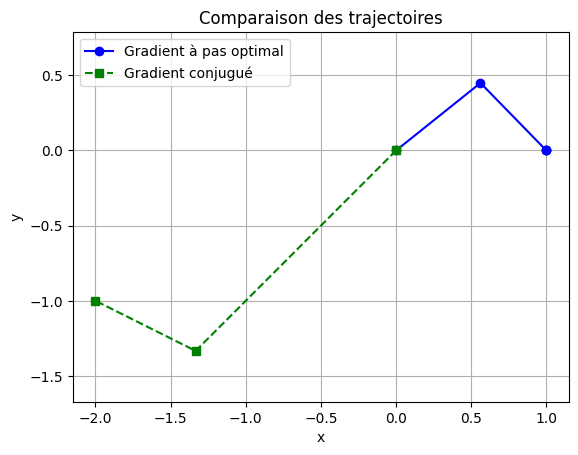

None


In [34]:
x_0 = np.array([0.0, 0.0])

A_14 = np.array([[2, 0],
              [0, 4]])

b_14 = np.array([-4, -4])


x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A_14, b_14, x_0)

# Résultats
print("Pour l'exercice 14:")
print("Gradient à pas optimal")
print("")
print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

x_opt_con, f_x_opt_con, temps_con, points_con = gradient_conjugue_quadratique(A_14, b_14, x_0)

# Résultats
print("")
print("Gradient conjugué")
print("Dernier point (x*) :", x_opt_con)
print("Valeur de f(x*) :", f_x_opt_con)
print("Temps d'exécution :", temps_con, "secondes")
print("Nombre d'itérations :", len(points_con) - 1)

print(comparaison(points_pas, points_con))

print("")
print("Pour l'exercice 15:")

print("")
print("Gradient à pas optimal")




A_15 = np.array([[1, 0], [0, 4]])
b_15 = np.array([4, 8])

x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A_15, b_15, x_0)

print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

x_opt_pas, f_x_opt_pas, temps_pas, points_pas = gradient_conjugue_quadratique(A_15, b_15, x_0)

print("")
print("Gradient conjugué")
print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

print(comparaison(points_pas, points_con))

print("")
print("Pour l'exercice 16:")
print("")

A_16 = np.array([[10, 8], [8, 10]])
b_16 = np.array([10, 8])

x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A_16, b_16, x_0)

print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

x_opt_pas, f_x_opt_pas, temps_pas, points_pas = gradient_conjugue_quadratique(A_16, b_16, x_0)

print("")
print("Gradient conjugué")
print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

print(comparaison(points_pas, points_con))


# Q7, résultats

- Dans les trois cas les deux méthodes convergent vers le même minimum local. On l'observe grâce aux résultats obtenus précédemment.
- Il y a en effet une différence entre le résultat pratique (4 2) et le résultat théorique (2 1). Cette différence peut s'expliquer par l'utilisation du facteur 1/2 en pratique et du facteur 1 en théorie.


# Q8


In [35]:
def descente_gradient_pas_descroissant(f, initial_x, eps=1e-15, maximum_iterations=1000):
    
    time1 = time.time()
    x = initial_x.copy()
    l = [x.copy()]
    
    for k in range(1, maximum_iterations+1):
        val, grad = f(x, order=1)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < eps:
            break
        tk = 1.0 / k  # pas harmonique décroissant
        x = x - tk * grad
        l.append(x.copy())
        
    time2 = time.time()
    temps_tot = time2 - time1
    f_val = f(x, order=0)
    return x, f_val, temps_tot, l


x0_1 = np.array([0.5, 0.7])
x0_2 = np.array([-2.0, 2.0])

eps = 1e-6
max_iter = 10000

x_min_1, f_min_1, t1, traj_1 = descente_gradient_pas_descroissant(rastrigin, x0_1, eps, max_iter)
x_min_2, f_min_2, t2, traj_2 = descente_gradient_pas_descroissant(rastrigin, x0_2, eps, max_iter)

print("Point de départ (0.5, 0.7)")
print("Minimum trouvé :", x_min_1)
print("Valeur en ce point :", f_min_1)
print("Nombre d'itérations :", len(traj_1)-1)
print()

print("Point de départ (-2.0, 2.0)")
print("Minimum trouvé :", x_min_2)
print("Valeur en ce point :", f_min_2)
print("Nombre d'itérations :", len(traj_2)-1)

Point de départ (0.5, 0.7)
Minimum trouvé : [1.40413443e-09 1.98991223e+00]
Valeur en ce point : 3.979831190554087
Nombre d'itérations : 256

Point de départ (-2.0, 2.0)
Minimum trouvé : [ 6.04249983e-12 -6.04249983e-12]
Valeur en ce point : 0.0
Nombre d'itérations : 2


# 

# Analyse des minima locaux pour la fonction Rastrigin

- La fonction Rastrigin est non convexe et présente de nombreux minima locaux.
- En appliquant la descente de gradient à pas décroissant depuis deux points initiaux différents, on observe que :
  - Les deux méthodes convergent vers des minima locaux.
  - Ces minima locaux ne sont pas nécessairement les mêmes.
- Cela s'explique par la nature oscillante de la fonction.
- Le minimum global est atteint uniquement si le point initial est dans le "bassin d’attraction" correspondant (autour de (0,0) ici).


# Bonus

[[    4.    -4.     0. ...     0.     0.     0.]
 [   -4.    10.    -6. ...     0.     0.     0.]
 [    0.    -6.    14. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...  3994. -1998.     0.]
 [    0.     0.     0. ... -1998.  3998. -2000.]
 [    0.     0.     0. ...     0. -2000.  2000.]]
Question bonus
Pour le gradient à pas optimal
Dernier point (x*) : [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000

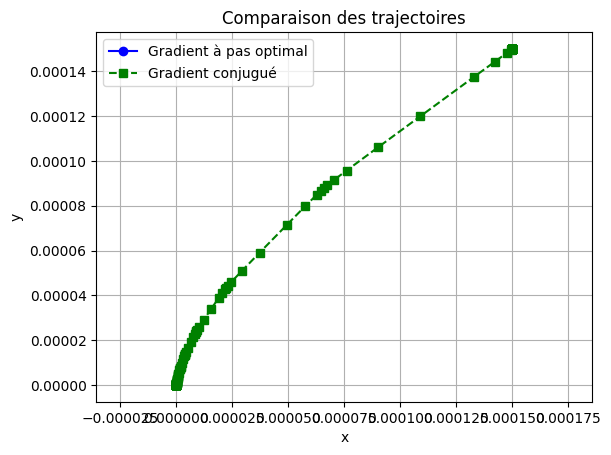

None


In [36]:
#Matrice A :


n = 1000

I = np.zeros(n)
I[0] = 4
I[1:-1] = 4 * np.arange(2, n) + 2
I[-1] = 2 * n


N= -2 * np.arange(2, n+1)


A = np.diag(I) + np.diag(N, 1) + np.diag(N, -1)

print(A)

#Vecteur b:

b=np.zeros(n)

# Point initial
initial_x = np.zeros(n)
initial_x[-1]=0.15


print ('Question bonus')
print('Pour le gradient à pas optimal')
x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A, b, initial_x)

print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'execution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)

print('Pour le gradient conjugué')
x_opt_con, f_x_opt_con, temps_con, points_con = gradient_conjugue_quadratique(A, b, initial_x)
print("Dernier point (x*) :", x_opt_con)
print("Valeur de f(x*) :", f_x_opt_con)
print("Temps d'exécution :", temps_con, "secondes")
print("Nombre d'itérations :", len(points_con) - 1)

print(comparaison(points_pas, points_con))
